# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
    
    
---
* [영상처리를 위한 딥러닝3](#영상처리를-위한-딥러닝3)
  * [Tensor](#Tensor)
      * [상수](#상수)
      * [변수](#변수)
      * [Numpy 호환성](#Numpy-호환성)
  * [Functional Paradigm ](#Functional-Paradigm )
      * [Functional API:Model](#Model)

* [None의 비밀](#None의-비밀)
* [모델의 역할](#모델의-역할)

---
## 영상처리를 위한 딥러닝3

- 딥러닝: 레이어 많은 퍼셉트론
    -  OOP ,functional programming, array programming (Numpy, Tensor를 이용한 선형대수)

## Tensor
- pytorch에 정리 잘 되어있으므로 흐름 잡기로 참고 [LEARNING PYTORCH WITH EXAMPLES](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)
- 레이어, 학습 맞춤설정 가능

### Numpy 특징
1. n-dimesnsional array 지원
2. vectorization으로 빠른 연산
    - 수치해석부분이 많아서 딥러닝에 필요한 기능을 제공하지 않음(gradient, computation graphs..)
    - 직접 다 구현은 가능하지만 데이터가 많은경우 cpu로는 많은 연산하는데에 한계가 있음
    - :( mutable 사용하여 값이 return없이 변경되는 경우가 있음

### Tensor 특징
1. n dimensional tensor 
    - dl에 초점이 맞춰져 있는 framework
2. **GPU도 지원함**
3. 자동 미분(Auto differentiation)
4.  간결하게 작성 가능
5. 새로운 기법
    - 예전에는 행렬로 구분안하고 for 이용했었음
    - 벡터,행렬 연산은 NN은 모두 행렬의 함수로 치환 가능하면서 구현 쉬워짐
    - 더 빠르게 처리 가능
6. functional paradigm
    -  **immutable 방식 지원 **
        - immutable 사용해서 encapsulation캡슐화 활용가능
        - 객체로 만들어져 있어 값까지 재사용하고 상속하여 custom도 가능
        
> nn module 
    - pytorch에서는 keras처럼 고수준으로 이미 만들어 진거 지원
    - tf에서는 수준

7.  control Flow : if, for 등으로 동적으로 사용 가능
    - 모델 생성시 declarative (선언적) 방법은 control flow 기본적으로 지원 안 함
        - 예.Sequential
        
> 객체에서 지원하지 않는 기능은 tensor로 만들어야함
새로운 도메인에 학습이 실제로 안되는 경우가 있어서 저수준으로 만들어야함

---

### 상수
- 재할당(reassign) 불가 
    - `tf.constant` 함수 
    
### 변수
- `tf.Variable` 클래스

   > 변수 -> weight,상수 -> nodes

Tensor 및 작업 참고:https://www.tensorflow.org/tutorials/customization/basics?hl=ko

In [1]:
import tensorflow as tf

In [ ]:
tf.debugging.set_log_device_placement(True) #gpu/cpu확인 용도

In [2]:
a= tf.constant([1,2,3]) #function; signature
b=tf.Variable([1,2,3])  #class   ; init signature

In [3]:
a.assign([1]) #불가

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

In [4]:
b.assign([4,5,6]) #할당 가능

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([4, 5, 6], dtype=int32)>

In [5]:
type(tf.constant)

function

In [6]:
a=3 #python 언어 자체에서는 재할당 할 수는 있긴 함
a

3

In [7]:
for i in dir(b):
    if 'assign' in i:
        print(i)

_assign_dependencies
_strided_slice_assign
assign
assign_add
assign_sub


### assign_add 
- +=

#### assign_sub  
- -=

In [8]:
b.assign_add([1,1,1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([5, 6, 7], dtype=int32)>

In [9]:
b.assign_sub([4,4,4])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

연산자 오버로딩 지원

In [10]:
tf.add(1,2)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [11]:
tf.add([1,2],[3,4]) #element wise 

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6], dtype=int32)>

In [12]:
tf.square(2)+tf.square(3)

<tf.Tensor: shape=(), dtype=int32, numpy=13>

In [13]:
tf.reduce_sum([1,2,3]) #값 축약

<tf.Tensor: shape=(), dtype=int32, numpy=6>

https://www.tensorflow.org/tutorials/quickstart/advanced?hl=ko

- tensor로 변경해서 함
- 가져다 쓰는 레이어,모델에는 한계가 있어서 상속하거나 직접 만들어야함
---
### Numpy 호환성


In [14]:
b.shape, b.dtype

(TensorShape([3]), tf.int32)

In [15]:
b #shape, dtype 기본적으로 repr로 보여줌

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [16]:
b.numpy() #Numpy로 호환 가능  bound -> function

array([1, 2, 3], dtype=int32)

#### tf -> numpy
- numpy로 바꾸고 나서 numpy연산



In [17]:
a= tf.constant([1,2,3]) 
b= tf.constant([4,5,6]) 

In [18]:
import numpy as np

In [19]:
c=np.add(a,b)  #tensor를 numpy로 계산이 되어  Numpy ndarray로 변환됨
c

array([5, 7, 9], dtype=int32)

#### numpy -> tf
- tensor로 바꾸고 나서 tensor연산
    - 큰 데이터인 경우 type casting하면 더 많은 resource 필요

- 이전에는 Numpy로 하였지만 처음부터 데이터를 tensor로 관리
    - `keras`: Numpy format 
    - `tf.datasets`: tensor로 된 연습용 데이터 
        - 실무에서는 남들이 가져다 쓰면서 Numpy로 호환가능(Python dependent)
        - 범용 format 인 hdf5(Hierarchical Data Format version 5): 대용량 데이터를 저장하기 위한 파일 포맷

In [20]:
c=np.array([1,2,3])
d=np.array([4,5,6])  

In [21]:
e=tf.add(c,d)  # Numpy를 tensor연산해서 Tensor 로 바꾸어줌 (중요)
e

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([5, 7, 9])>

- GPU 분산처리 자동으로 가능 
- 지정해서 특정 CPU,GPU사용하도록 함

### tf.data.Dataset
- tensor로 만들어진 연습용 이미지 데이터셋 
- holdout, shuffle ,stratification


In [23]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [24]:
X_train # Numpy foramt 써도 GPU지원 됨 

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

---
## Functional Paradigm 
- 이론 실제의 간극을 줄임
    - 형식적 증명 가능성
- **multi-input,multi-output** 지원 
    - keras의  Model : 하나의 레이어에서 여러개의 input으로 받아서 여러개의 output
        - CNN Architecture: LesNet, GoogleNet
            - <> keras의 Sequential:  하나의 값을 단반향으로 FForward 가능하여 멀티 불가

In [25]:
tf.keras.optimizers.Adam #class
tf.nn.relu
tf.keras.activations.relu #function
'relu'                    #string

'relu'

### keras Functional API
- models with non-linear topology, shared layers, and even multiple inputs or output
- Models with multiple inputs and outputs
- All models are callable, just like layers
    - By calling a model you aren't just reusing the architecture of the model, you're also reusing its weights.


참고 : https://keras.io/guides/functional_api/
#### Model
- multi-inputs, multi- outputs지원 
- 더 다양하고 복잡한 모델 생성 가능
    - Sequential이 Model로 부터 상속 받음
- Model( inputs= ,outputs=)
    - Sequential과 다르게 만듦 -> functional paradigm ->__call__ 합성함수 
    - 여러개의 입력,출려값 인자로 받음

In [26]:
tf.keras.models.Model    #대문자 2개 : Model, Sequential class
tf.keras.models.Sequential

tensorflow.python.keras.engine.sequential.Sequential

In [27]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test= x_train/255 ,x_test/255

In [28]:
#이전에 배운 Sequential 예시
model0 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [29]:
dir(tf.keras.layers.Flatten()) #__call__ 있음 - > 합성함수 방식처럼 사용함

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_cast_single_input',
 '_channels_first',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_compute_dtype',
 '_compute_dtype_object',
 '_dedup_weights',
 '_default_training_arg',
 '_deferred_dependencies',
 '_dtype'

In [30]:
class X:
    def __call__(self):
        print('A')
        
X()()

A


In [31]:
# Functional Paradigm : __call__ -> 합성합수 방식
input_ = tf.keras.Input(shape=(28,28))    #input_shape과 동일; Flatten을 언제하냐의 차이
flatten =tf.keras.layers.Flatten()(input_) #모델내에서 flatten  
dense1=tf.keras.layers.Dense(128, activation='relu')(flatten)
dense2=tf.keras.layers.Dense(10, activation='softmax')(dense1)

model= tf.keras.models.Model(inputs=input_, outputs=dense2)

summary
- input_3 (InputLayer)의  Output Shape [(None, 28, 28)] 이 list `[]`에 있는 이유는 multi-inputs, multi-outputs  

In [32]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


학습, 평가하는 방식 동일

In [52]:
#나머지 동일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2557 - accuracy: 0.9272
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1147 - accuracy: 0.9655
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0788 - accuracy: 0.9769
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0588 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0449 - accuracy: 0.9860


### 모델 저장
- model.save()
    - 모델을 하나의 파일에 저장 
        - 모델 아키텍쳐(구조),학습통해서 얻은 가중치값, 학습한 지점부터 이어하기위해 optimizer 상태 저장 
- save_format= 'tf' (기본값)
    - 'h5' :용량이 작음

In [ ]:
model.save("path_my_model.h5")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("path_my_model.h5")
!ls my_model

In [33]:
mv2=tf.keras.applications.MobileNetV2()
mv2.summary() # connected to가 생김

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [34]:
issubclass(mv2.__class__, tf.keras.models.Model)

True

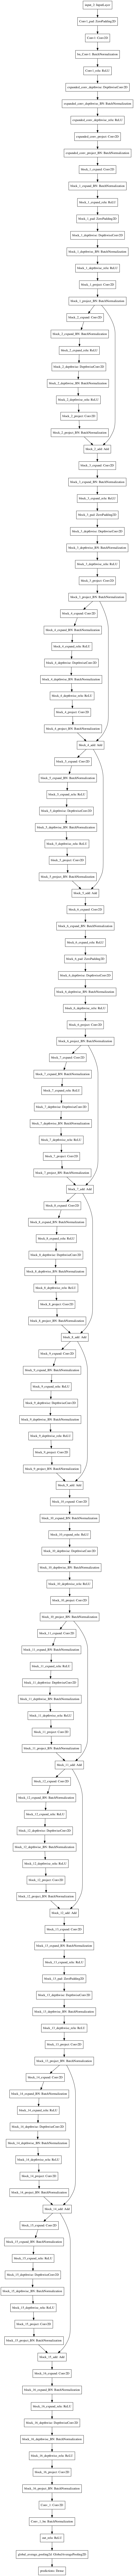

In [35]:
tf.keras.utils.plot_model(mv2) #모델 시각화

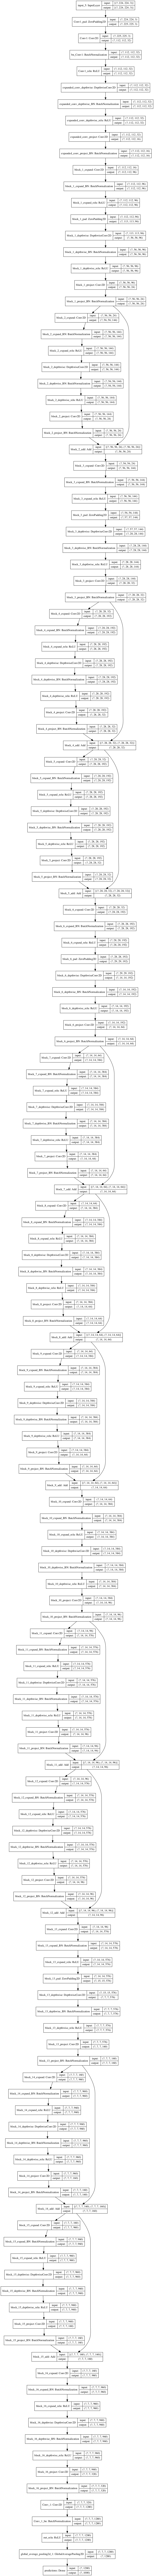

In [50]:
tf.keras.utils.plot_model(mv2, show_shapes=True) #intput,output 모양

### model 중첩
- Model, Sequential 모델 모두 layer처럼 functional paradim으로 사용 가능
    - Sequential은 Model을 상속함
- array programming, functional paradigm, oop 조합

In [36]:
issubclass(type(tf.keras.models.Sequential), type(tf.keras.models.Model)) #Model > Seq

True

In [37]:
dir(model0) #__call__ -> functional paradigm

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_cast_single_input',
 '_check_call_args',
 '_checkpoint_dependencies',
 '_clear_los

In [38]:
#이전에 배운 Sequential 예시
model0 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu', input_shape=(28,28)), #영향 안끼침
  tf.keras.layers.Dense(10, activation='softmax')
])

In [39]:
tf.keras.Input(shape=(28,28))
x=model0(input_)
model1= tf.keras.models.Model(inputs=input_, outputs=x) #이렇게 해서도 학습 가능

In [40]:
'input' ,28 * 28 * 128 +128 ,' output' ,128*10 +10

('input', 100480, ' output', 1290)

In [41]:
model0.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


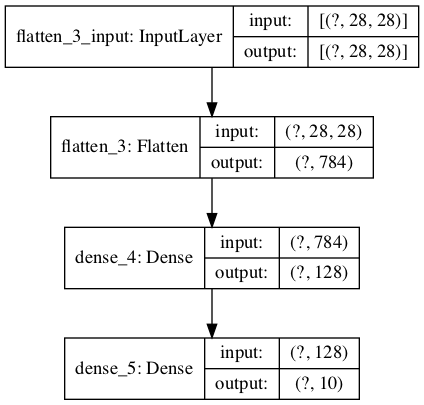

In [42]:
tf.keras.utils.plot_model(model0, show_shapes=True)

In [43]:
model1.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 10)                101770    
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


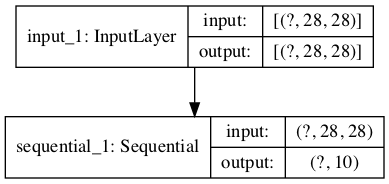

In [44]:
tf.keras.utils.plot_model(model1, show_shapes=True)

In [61]:
#나머지 동일
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0641 - accuracy: 0.9801
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0569 - accuracy: 0.9812
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0509 - accuracy: 0.9833
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0475 - accuracy: 0.9839
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0428 - accuracy: 0.9856


### 모델의 역할
- 모델의 레이어를 인덱싱 가능
- 모델은 레이어를 그룹으로 관리하기 위해서 묶어둔 것

In [142]:
model0.layers

In [144]:
model0.layers[0]

In [143]:
model1.layers #모델안에 모델의 레이어로 하면 해당 모델전체가 나옴 - >

In [145]:
model1.layers[1].layers

---
- nhw format으로 넣어야하기 때문에 하나만 넣는 경우 차원 추가함 
    - 예. 데이터 하나만 넣는 경우 : (28,28) -> (1,28,28)
    - 28x28이 1개

In [45]:
x_train[0].shape  #0번째 데이터 

(28, 28)

In [46]:
#N 개중 1개인 0번째 데이터 (28,28)-> (1, 28,28)
model0(x_train[0][tf.newaxis]) 
model0(tf.expand_dims(x_train[0], axis= 0))
model0(np.expand_dims(x_train[0], axis= 0))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.07446229, 0.14365774, 0.08215217, 0.06910189, 0.08981731,
        0.09697766, 0.06418721, 0.12501535, 0.1329258 , 0.12170257]],
      dtype=float32)>

In [61]:
#N 개중 3개 데이터  (3, 28,28)
model0(x_train[0:3]) 

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0.07446227, 0.14365774, 0.08215217, 0.06910189, 0.0898173 ,
        0.09697766, 0.06418721, 0.12501535, 0.13292582, 0.12170257],
       [0.11067415, 0.10775353, 0.06237328, 0.08759981, 0.12808801,
        0.04762076, 0.14773782, 0.11459846, 0.13912793, 0.0544263 ],
       [0.11187723, 0.10315204, 0.0709724 , 0.07424192, 0.08981193,
        0.14493895, 0.13725135, 0.1400946 , 0.06381559, 0.06384407]],
      dtype=float32)>

In [48]:
x_train[0][None].shape

(1, 28, 28)

In [49]:
tf.expand_dims(x_train[0],0).shape

TensorShape([1, 28, 28])

In [50]:
 tf.expand_dims(x_train[0], axis=1).shape, x_train[0][...,tf.newaxis].shape

(TensorShape([28, 1, 28]), (28, 28, 1))

- keras 모든 model은 함수와 동일하게 사용 가능
합성 합수로 사용 가능
- 항수의 함수는 또 다른 함수가 됨
    - \_\_call__
- feature vector 1차원 데이터
28x28 = > 784 

In [53]:
model0(np.expand_dims(x_train[1], axis= 0)).numpy().sum() #softmax ->합 1

1.0

### predict 
- 신경망에서는 feed forward
- 객체지향의 다형성 - 모델마다 predict가 다르게 행동함
    - 예. 비행기가 날아간다 != 새가 날아간다 

In [54]:
model.predict(tf.expand_dims(x_train[0],0))

array([[0.09543149, 0.08851426, 0.10845027, 0.07656956, 0.11035989,
        0.09296214, 0.09409158, 0.05410863, 0.1462761 , 0.13323605]],
      dtype=float32)

In [99]:
#메모리가 다름
model(tf.expand_dims(x_train[0], axis= 0)) is model.predict(tf.expand_dims(x_train[0],0))

False

In [55]:
# 동일함
np.array_equal(model(tf.expand_dims(x_train[0], axis= 0)) , 
model.predict(tf.expand_dims(x_train[0],0)))

True

### None의 비밀 
- python: 아무것도 없다
- tf    : 결정 된게 없다
    -  몇개가 들어오는지 미자정 했기 때문에  각각 가로,세로 28,28 로 여러개 들어감 
    - tf1의 placeholder와 같은 개념


- (28,28) 이미지가 784개가 되어 128로 가서 10개로 출력됨


array programming- input_shape, output결정하면 거기에만 맞추면되는데
input_shape 안맞으면 입력된 데이터를 바탕으로 맞춰줌 

In [1]:
import tensorflow as tf

In [2]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test= x_train/255 ,x_test/255

In [9]:
£
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

input_shape없으면 array programming에서 행렬 전체 모양을 못 만들기 때문에 summary안나옴

In [10]:
model.summary() #Output shape 중요

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
#이전에 배운 Sequential 예시
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

input_shape없으면 array programming에서 행렬 전체 모양을 못 만들기 때문에 summary안나옴

In [12]:
model.summary() #Output shape 중요

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [57]:
model(x_train[0:3]).shape

TensorShape([3, 10])

In [58]:
x_train[0].shape

(28, 28)

#### inpus_shape 없는 경우
- input_shape 제거하면 입력 데이터의 모양이 무엇인지 모르지만 Error없이 실행
- dtype도 기본 dtype을 autocasting
- 지정되어 있지않으면 내부적으로 input_shape은 데이터가 들어나고나서 결정됨
- 미리 지정되면 해당 모양만 가능 
    - \_\_built__

In [5]:
model(x_train[0][tf.newaxis]) #경고가 나오지만 실행


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.08760014, 0.1380407 , 0.04833152, 0.06963791, 0.11197668,
        0.12501314, 0.12358339, 0.08874624, 0.06908835, 0.13798194]],
      dtype=float32)>

In [6]:
#나머지 동일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (1, 784)                  0         
_________________________________________________________________
dense (Dense)                (1, 128)                  100480    
_________________________________________________________________
dropout (Dropout)            (1, 128)                  0         
_________________________________________________________________
dense_1 (Dense)              (1, 10)                   1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [127]:
28*28*128+128 

100480

In [7]:
model.fit(x_train, y_train, epochs=1)
model.summary() #학습 후에 summary나옴 None

1875/1875 [==============================] - 5s 2ms/step - loss: 0.2908 - accuracy: 0.9163: 4s - loss: 0.7504 - accu - ETA: 0s - loss: 0.3030 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [1]:
import tensorflow as tf

In [2]:
#이전에 배운 Sequential 예시
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
import numpy as np

In [5]:
x=np.arange(9).reshape(1,3,3) #자동으로 모양을 맞춰줬으므로 다른 shape인 경우 불가됨 
model(x)  

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.02058315, 0.08724103, 0.04072078, 0.07706264, 0.03903231,
        0.5794228 , 0.09046475, 0.04625104, 0.00772179, 0.01149976]],
      dtype=float32)>

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()  #구조 결정됨

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (1, 9)                    0         
_________________________________________________________________
dense (Dense)                (1, 128)                  1280      
_________________________________________________________________
dropout (Dropout)            (1, 128)                  0         
_________________________________________________________________
dense_1 (Dense)              (1, 10)                   1290      
Total params: 2,570
Trainable params: 2,570
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(x_train, y_train, epochs=1) #모양 안맞으면 error
model.summary() 

NameError: name 'x_train' is not defined

In [130]:
import inspect #summary 의 소스 코드 확인하기
print(inspect.getsource(model.summary))

  def summary(self, line_length=None, positions=None, print_fn=None):
    """Prints a string summary of the network.

    Arguments:
        line_length: Total length of printed lines
            (e.g. set this to adapt the display to different
            terminal window sizes).
        positions: Relative or absolute positions of log elements
            in each line. If not provided,
            defaults to `[.33, .55, .67, 1.]`.
        print_fn: Print function to use. Defaults to `print`.
            It will be called on each line of the summary.
            You can set it to a custom function
            in order to capture the string summary.

    Raises:
        ValueError: if `summary()` is called before the model is built.
    """
    if not self.built:
      raise ValueError('This model has not yet been built. '
                       'Build the model first by calling `build()` or calling '
                       '`fit()` with some data, or specify '
                       '

- build  조합해야함
- keras, pytorch 이론적인 내용 그대로 구현해 놓음